# 1. Data Exploration

1.1 Load and Inspect the Dataset

In [1]:
import os

working_directory = "/Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files/GitHub_Repository"
os.chdir(working_directory)
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files/GitHub_Repository


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "data/metacritic_games_master.csv" 
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(df.info())  # shows column types and non-null counts

print("\nFirst 5 Rows of the Dataset:")
print(df.head())  # display the first few rows

print("\nSummary Statistics for Numerical Columns:")
print(df.describe())  # summary stats for numerical columns

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19317 entries, 0 to 19316
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19317 non-null  int64  
 1   title           19317 non-null  object 
 2   release_date    19317 non-null  object 
 3   genre           19317 non-null  object 
 4   platforms       19317 non-null  object 
 5   developer       19298 non-null  object 
 6   esrb_rating     17202 non-null  object 
 7   ESRBs           7855 non-null   object 
 8   metascore       19317 non-null  int64  
 9   userscore       19317 non-null  object 
 10  critic_reviews  19317 non-null  int64  
 11  user_reviews    17953 non-null  float64
 12  num_players     19304 non-null  object 
 13  summary         19199 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 2.1+ MB
None

First 5 Rows of the Dataset:
   Unnamed: 0                                     title

# 2. Data Cleaning

2.1 Visualize Missingness

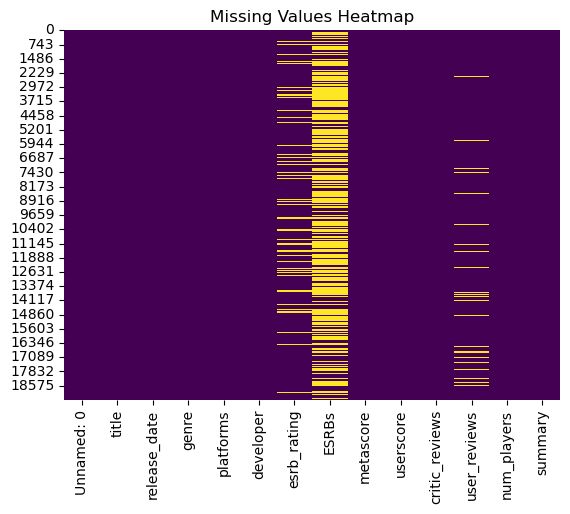

In [3]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

2.2 Drop Unnecessary Columns
* ESRBs column dropped since more than 50% of information is missing
* Unnamed: 0 column dropped since it's just number of related row

In [4]:
# Drop the ESRBs column
df = df.drop(columns=['ESRBs', 'Unnamed: 0'], errors='ignore')

print("Dataset Overview:")
print(df.info())  # shows column types and non-null counts

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19317 entries, 0 to 19316
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           19317 non-null  object 
 1   release_date    19317 non-null  object 
 2   genre           19317 non-null  object 
 3   platforms       19317 non-null  object 
 4   developer       19298 non-null  object 
 5   esrb_rating     17202 non-null  object 
 6   metascore       19317 non-null  int64  
 7   userscore       19317 non-null  object 
 8   critic_reviews  19317 non-null  int64  
 9   user_reviews    17953 non-null  float64
 10  num_players     19304 non-null  object 
 11  summary         19199 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB
None


2.3 Check unique values in each feature to detect placeholder missing values

In [5]:
# Check unique values in each column
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in 'title':
['Burnout 3: Takedown' 'Jet Grind Radio'
 'Metal Gear Solid 4: Guns of the Patriots' ...
 'Family Party: 30 Great Games Obstacle Arcade' 'Smash T.V.'
 "JoJo's Bizarre Adventure: Eyes of Heaven"]


Unique values in 'release_date':
['Sep  7, 2004' 'Oct 30, 2000' 'Jun 12, 2008' ... 'Jul  5, 2007'
 'Apr 25, 2001' 'Jul  6, 2006']


Unique values in 'genre':
['Driving, Racing, Arcade' 'Action, Platformer, 3D'
 'Action Adventure, Modern, General, Modern' ...
 'Massively Multiplayer Online, Modern, Role-Playing, Massively Multiplayer'
 'Driving, Action Adventure, Modern, Racing, General, Modern, Motorcycle, Motocross'
 'Driving, Modern, Racing, Motorcycle, Motocross, Modern, Action Adventure, General']


Unique values in 'platforms':
['Xbox' 'Dreamcast' 'PlayStation 3' 'Xbox 360' 'PlayStation 2' 'PC'
 'GameCube' 'PlayStation' 'Nintendo 64' 'Xbox Series X' 'Switch' 'DS'
 'Wii U' 'Wii' 'PlayStation 4' 'PlayStation Vita' 'PlayStation 5'
 'Game Boy Advance' 'Xbox One' '3D

2.4 Replace placeholder values with NaN

In [6]:
import numpy as np

# Define placeholder values to treat as missing
placeholders = ["Unknown", "N/A", "TBD", "-", "none", "tbd"]

# Replace placeholders in the entire DataFrame
df = df.replace(placeholders, np.nan)

# Verify the changes
print("Dataset after replacing placeholders:")
print(df.isnull().sum())

Dataset after replacing placeholders:
title                0
release_date         0
genre                0
platforms            0
developer           19
esrb_rating       2115
metascore            0
userscore         1364
critic_reviews       0
user_reviews      1364
num_players         13
summary            118
dtype: int64


2.5 Check the missingness relationship between features

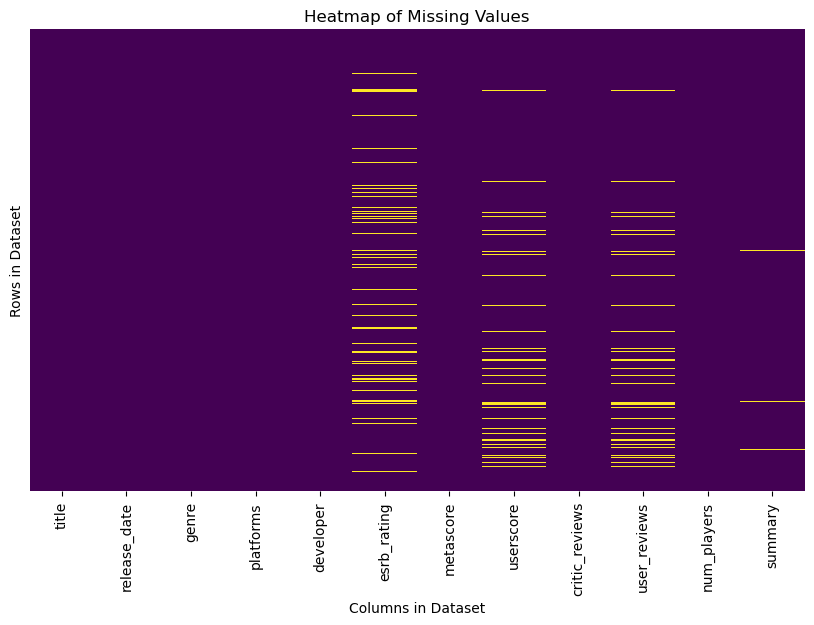

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a heatmap of missing values to see their structure
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns in Dataset")
plt.ylabel("Rows in Dataset")
plt.show()

2.6 Correlation between missing values

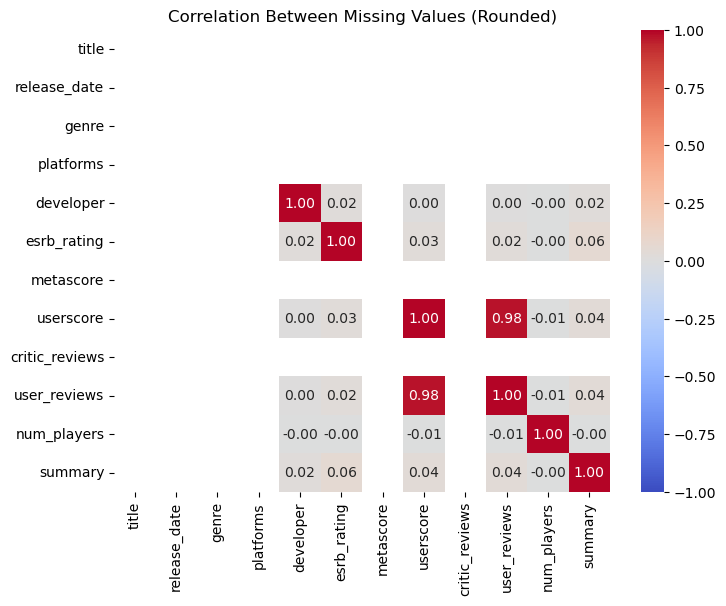

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a dataframe indicating missing values (1 for missing)
missing_data = df.isnull().astype(int)

# calculate the correlation matrix for missing values
missing_corr = missing_data.corr()

# plot the missing value correlation heatmap with rounded values
plt.figure(figsize=(8, 6))
sns.heatmap(missing_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Between Missing Values (Rounded)")
plt.show()

2.7 Missing Value Imputation (esrb_rating)

In [9]:
overall_mode = df['esrb_rating'].mode()[0]
df['esrb_rating'] = df.groupby('genre')['esrb_rating'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else overall_mode)
)

2.8 Extract Release Year to use them for imputation of missing values and also make them numerical

In [10]:
import pandas as pd

# Step 1: Convert `release_date` to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Step 2: Extract `release_year`
df['release_year'] = df['release_date'].dt.year

# drop rows with missing dates
df = df.dropna(subset=['release_year'])

# Step 5: Verify the results
print(df)

                                              title release_date  \
0                               Burnout 3: Takedown   2004-09-07   
1                                   Jet Grind Radio   2000-10-30   
2          Metal Gear Solid 4: Guns of the Patriots   2008-06-12   
3           Tom Clancy's Splinter Cell Chaos Theory   2005-03-28   
4                    Call of Duty: Modern Warfare 2   2009-11-10   
...                                             ...          ...   
19312  Family Party: 30 Great Games Obstacle Arcade   2012-12-04   
19313                     Ride to Hell: Retribution   2013-06-24   
19314                       Far Cry 5: Lost on Mars   2018-07-17   
19315                                    Smash T.V.   2005-11-24   
19316      JoJo's Bizarre Adventure: Eyes of Heaven   2016-06-28   

                                                   genre      platforms  \
0                                Driving, Racing, Arcade           Xbox   
1                                

* Convert release year into int

In [11]:
# Ensure `release_year` and `release_decade` are integers
df['release_year'] = df['release_year'].fillna(0).astype(int)

# Verify the changes
print(df[['release_date', 'release_year']].head())

  release_date  release_year
0   2004-09-07          2004
1   2000-10-30          2000
2   2008-06-12          2008
3   2005-03-28          2005
4   2009-11-10          2009


2.9 Drop Rows with Missing Values (userscore and user_reviews)
* Since the userscore is one of our target variables, to not introduce bias rows with missing values has dropped

In [12]:
# Drop rows where userscore or user_reviews are missing
df_cleaned = df.dropna(subset=['userscore', 'user_reviews'])

# Verify the new shape of the dataset
print("Dataset shape after dropping missing rows:", df_cleaned.shape)

# Check for any remaining missing values
print("Remaining missing values:", df_cleaned.isnull().sum())

Dataset shape after dropping missing rows: (17914, 13)
Remaining missing values: title              0
release_date       0
genre              0
platforms          0
developer         16
esrb_rating        0
metascore          0
userscore          0
critic_reviews     0
user_reviews       0
num_players       13
summary           88
release_year       0
dtype: int64


2.10 Impute missing values for developer, num_players and summary

In [13]:
# Impute 'developer' with 'Unknown'
df_cleaned.loc[:, 'developer'] = df_cleaned['developer'].fillna("Unknown")

# Impute 'num_players' with the most frequent value
most_frequent_num_players = df_cleaned['num_players'].mode()[0]
df_cleaned.loc[:, 'num_players'] = df_cleaned['num_players'].fillna(most_frequent_num_players)

# Impute 'summary' with 'No Summary'
df_cleaned.loc[:, 'summary'] = df_cleaned['summary'].fillna("No Summary")

2.11 title will be the index of the dataset so we will merge rows for unique titles

In [14]:
df_cleaned['userscore'] = pd.to_numeric(df_cleaned['userscore'], errors='coerce')

/var/folders/d1/myh4s_bj49bglpp9bnck2fvr0000gn/T/ipykernel_1199/1308202265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['userscore'] = pd.to_numeric(df_cleaned['userscore'], errors='coerce')


In [15]:
# Weighted average function
def weighted_average(values, weights):
    return (values * weights).sum() / weights.sum()

# Aggregate dataset by 'title'
df_merged = (
    df_cleaned.groupby('title').agg({
        # Weighted averages for metascore and userscore
        'metascore': lambda x: weighted_average(x, df_cleaned.loc[x.index, 'critic_reviews']),
        'userscore': lambda x: weighted_average(x, df_cleaned.loc[x.index, 'user_reviews']),
        # Summing reviews (total counts)
        'critic_reviews': 'sum',
        'user_reviews': 'sum',
        # Combine unique genres, platforms, and developers
        'genre': lambda x: ', '.join(sorted(set(', '.join(x).split(', ')))),
        'platforms': lambda x: ', '.join(sorted(set(x))),
        'developer': lambda x: ', '.join(sorted(set(x))),
        # Take the most common value for categorical features like esrb_rating
        'esrb_rating': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
        'num_players': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
        # For textual columns like summary, keep the first non-null value
        'summary': 'first',
        # Keep numerical fields as is
        'release_date': 'first',
        'release_year': 'first',
    }).reset_index()
)

# Print merged dataset
print("Merged dataset shape:", df_merged.shape)

Merged dataset shape: (11665, 13)


* Data Types Fixed:
	•	userscore is now of type float64, resolving issues with arithmetic operations.
	•	All numeric columns (metascore, critic_reviews, user_reviews) are confirmed to have correct numeric types.
* Data Aggregation:
	•	Titles with multiple rows have been successfully merged using weighted averages for metascore and userscore.
	•	Genres, platforms, and developers are combined to reflect all associated values for each title.
	•	ESRB ratings take the most common value for each game.
	•	The final dataset is compact and structured, with 11,665 unique titles.

In [16]:
print("Data types after conversion:")
print(df_cleaned.dtypes)

print("Summary of merged dataset:")
print(df_merged.head())

print("Number of unique titles:", df_merged['title'].nunique())

Data types after conversion:
title                     object
release_date      datetime64[ns]
genre                     object
platforms                 object
developer                 object
esrb_rating               object
metascore                  int64
userscore                float64
critic_reviews             int64
user_reviews             float64
num_players               object
summary                   object
release_year               int64
dtype: object
Summary of merged dataset:
                         title  metascore  userscore  critic_reviews  \
0                       #IDARB      77.00   6.900000              31   
1                'Splosion Man      84.00   7.800000              52   
2                     .detuned      46.00   3.700000               9   
3      .hack//G.U. Last Recode      74.25   8.170408              28   
4  .hack//G.U. vol. 1//Rebirth      69.00   8.000000              21   

   user_reviews                                             genre  \

* Bring both target variable in a 0-100 scale

In [17]:
# Multiply 'userscore' by 10 to bring it to the same scale as 'metascore'
df_merged['userscore'] = df_merged['userscore'] * 10

# Drop unnecessary columns
columns_to_drop = ['critic_reviews', 'user_reviews', 'release_date']
dataset_cleaned = df_merged.drop(columns=columns_to_drop, axis=1)

# Confirm changes
print("Updated dataset:")
print(dataset_cleaned.head())
print("\nRemaining columns:", dataset_cleaned.columns)

Updated dataset:
                         title  metascore  userscore  \
0                       #IDARB      77.00  69.000000   
1                'Splosion Man      84.00  78.000000   
2                     .detuned      46.00  37.000000   
3      .hack//G.U. Last Recode      74.25  81.704082   
4  .hack//G.U. vol. 1//Rebirth      69.00  80.000000   

                                              genre          platforms  \
0  Action, General, Miscellaneous, Party / Minigame           Xbox One   
1                   2D, Action, General, Platformer           Xbox 360   
2              Action, Miscellaneous, Music, Rhythm      PlayStation 3   
3                        Compilation, Miscellaneous  PC, PlayStation 4   
4                          Action RPG, Role-Playing      PlayStation 2   

                 developer esrb_rating                    num_players  \
0  Other Ocean Interactive           E                       1 Player   
1      Twisted Pixel Games        E10+  1-4 Players, 4 

* Set title column as an index of the dataset

In [18]:
# Set 'title' as the index
dataset_cleaned = dataset_cleaned.set_index('title')

# Confirm changes
print("Updated dataset:")
print(dataset_cleaned.head())
print("\nRemaining columns:", dataset_cleaned.columns)

Updated dataset:
                             metascore  userscore  \
title                                               
#IDARB                           77.00  69.000000   
'Splosion Man                    84.00  78.000000   
.detuned                         46.00  37.000000   
.hack//G.U. Last Recode          74.25  81.704082   
.hack//G.U. vol. 1//Rebirth      69.00  80.000000   

                                                                        genre  \
title                                                                           
#IDARB                       Action, General, Miscellaneous, Party / Minigame   
'Splosion Man                                 2D, Action, General, Platformer   
.detuned                                 Action, Miscellaneous, Music, Rhythm   
.hack//G.U. Last Recode                            Compilation, Miscellaneous   
.hack//G.U. vol. 1//Rebirth                          Action RPG, Role-Playing   

                                     platfo

* Save the cleaned file as cleaned_dataset_v1

In [19]:
dataset_cleaned.to_csv("cleaned_dataset_v1.csv", index=True)